In [2]:
# Importa la biblioteca de visualización Matplotlib
import matplotlib.pyplot as plt

# Importa la biblioteca NumPy para manipulación numérica de datos
import numpy as np

# Importa la biblioteca Pandas para manipulación y análisis de datos tabulares
import pandas as pd

# Importa el módulo de colormaps de Matplotlib para la representación de colores
import matplotlib.cm as cm

# Importa métricas y funciones relacionadas con la evaluación de modelos de clustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans  # Importa el algoritmo KMeans de scikit-learn

# Importa Axes3D para la creación de gráficos tridimensionales
from mpl_toolkits.mplot3d import Axes3D

# Importa módulos relacionados con métricas de evaluación de modelos
from sklearn import metrics

# Importa datasets de scikit-learn para posibles conjuntos de datos de ejemplo
from sklearn import datasets


# 1.DATASET 
Este conjunto de datos es de naturaleza transaccional y contiene información sobre todas las transacciones realizadas entre el 01/12/2010 y el 09/12/2011 por una empresa de comercio electrónico con sede en el Reino Unido y registrada como minorista en línea no vinculado a tiendas físicas. La empresa se especializa en la venta de regalos únicos para cualquier ocasión. Muchos de sus clientes son mayoristas.

Fuente:
Dr. Daqing Chen, Director: Grupo de Analítica Pública. Correo electrónico: chend '@' lsbu.ac.uk, Escuela de Ingeniería, London South Bank University, Londres SE1 0AA, Reino Unido.

Cita:
Daqing Chen, Sai Liang Sain, y Kun Guo, "Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining" (Minería de datos para la industria minorista en línea: un estudio de caso del modelo RFM para la segmentación de clientes basada en minería de datos), Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197–208, 2012 (Publicado en línea antes de la impresión: 27 de agosto de 2012. doi: 10.1057/dbm.2012.17).

In [3]:
# Utiliza la biblioteca Pandas para leer un archivo CSV llamado 'Online Retail.csv'
# y carga los datos en un DataFrame llamado 'df'.
df = pd.read_csv('Online Retail.csv')


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


## Descripción del Conjunto de Datos

Aquí está una breve interpretación de las columnas:

- **InvoiceNo:** Número de factura asociado con la transacción.
- **StockCode:** Código del producto o artículo.
- **Description:** Descripción del artículo.
- **Quantity:** Cantidad de unidades del artículo compradas en esa transacción.
- **InvoiceDate:** Fecha y hora de la transacción.
- **UnitPrice:** Precio unitario del artículo.
- **CustomerID:** Identificación del cliente asociado con la transacción.
- **Country:** País donde se realizó la transacción.

Cada fila representa un artículo comprado en una transacción específica. Por ejemplo, la primera fila indica que se compraron 6 unidades del artículo con el código `85123A`, una descripción de `WHITE HANGING HEART T-LIGHT HOLDER`, con un precio unitario de 2.55, en la factura número `536365` realizada el 1 de diciembre de 2010 a las 8:26, por un cliente con la identificación `17850.0` en el Reino Unido.


In [5]:
df.shape

(541909, 8)

In [6]:
# El método describe() proporciona estadísticas descriptivas del DataFrame, incluyendo recuento, media, desviación estándar,
# mínimo, percentiles y máximo para cada columna numérica.

df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# Convertir 'InvoiceDate' a formato de fecha y hora
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%y %H:%M')

# Calcular las fechas máxima y mínima
fecha_maxima = df['InvoiceDate'].max()
fecha_minima = df['InvoiceDate'].min()

# Mostrar los resultados
print("Fecha Mínima:", fecha_minima)
print("Fecha Máxima:", fecha_maxima)


Fecha Mínima: 2010-12-01 08:26:00
Fecha Máxima: 2011-12-09 12:50:00


# 2. LIMPIEZA DE DATOS Y CREACIÓN DE ALGUNAS DIMENSIONES AD-HOC

In [8]:
# Eliminar órdenes canceladas
# Filtra el DataFrame para incluir solo las filas donde la cantidad es mayor que 0,
# eliminando así las órdenes canceladas.
df = df.loc[df['Quantity'] > 0]

# Eliminar registros sin CustomerID
# Filtra el DataFrame para incluir solo las filas donde CustomerID no es nulo,
# eliminando así los registros sin identificación de cliente.
df = df[pd.notnull(df['CustomerID'])]

# Eliminar el mes incompleto
# Filtra el DataFrame para incluir solo las transacciones anteriores al 1 de diciembre de 2011,
# eliminando así el mes incompleto.
df = df.loc[df['InvoiceDate'] < '2011-12-01']

# Calcular las ventas totales a partir de la cantidad y el precio unitario
# Agrega una nueva columna 'Sales' al DataFrame que representa las ventas totales
# calculadas multiplicando la cantidad y el precio unitario.
df['Sales'] = df['Quantity'] * df['UnitPrice']


In [9]:
df.shape

(380620, 9)

In [10]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
313104,564436,22896,PEG BAG APPLES DESIGN,1,2011-08-25 12:06:00,2.55,17841.0,United Kingdom,2.55
437187,574273,22507,MEMO BOARD RETROSPOT DESIGN,2,2011-11-03 14:33:00,4.95,16322.0,United Kingdom,9.90
215003,555640,22170,PICTURE FRAME WOOD TRIPLE PORTRAIT,4,2011-06-06 13:06:00,6.75,14475.0,United Kingdom,27.00
485229,577557,23397,FOOT STOOL HOME SWEET HOME,1,2011-11-20 15:36:00,9.95,15426.0,United Kingdom,9.95
345940,567183,82486,3 DRAWER ANTIQUE WHITE WOOD CABINET,6,2011-09-18 15:32:00,8.95,14769.0,United Kingdom,53.70
202193,554371,21558,SKULL LUNCH BOX WITH CUTLERY,6,2011-05-24 10:42:00,2.55,17659.0,United Kingdom,15.30
471337,576634,23480,MINI LIGHTS WOODLAND MUSHROOMS,8,2011-11-16 09:28:00,3.75,13297.0,United Kingdom,30.00
494397,578270,22144,CHRISTMAS CRAFT LITTLE FRIENDS,6,2011-11-23 13:39:00,4.13,14096.0,United Kingdom,24.78
129729,547387,22979,PANTRY WASHING UP BRUSH,12,2011-03-22 16:00:00,1.45,12539.0,Spain,17.40
30482,538866,22589,CARDHOLDER GINGHAM STAR,1,2010-12-14 14:40:00,2.55,17841.0,United Kingdom,2.55


In [11]:
# Utilizar groupby para agregar las ventas por CustomerID
# Agrupa el DataFrame por 'CustomerID' y utiliza la función agg para calcular la suma de ventas ('Sales')
# y la cantidad única de números de factura ('InvoiceNo') para cada cliente.
customer_df = df.groupby('CustomerID').agg({'Sales': sum, 
                                            'InvoiceNo': lambda x: x.nunique()})

# Seleccionar las columnas que queremos utilizar
# Renombra las columnas resultantes para reflejar mejor su significado.
customer_df.columns = ['TotalSales', 'OrderCount'] 

# Crear una nueva columna 'AvgOrderValue'
# Calcula el valor promedio de la orden dividiendo las 'TotalSales' entre 'OrderCount'.
customer_df['AvgOrderValue'] = customer_df['TotalSales'] / customer_df['OrderCount']

# Mostrar las primeras filas del nuevo DataFrame resultante
customer_df.sample(10)

/var/folders/vz/y_rjmxws0s14236gghbvxfy40000gq/T/ipykernel_91455/2067480646.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  customer_df = df.groupby('CustomerID').agg({'Sales': sum,


,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
17790.0,1965.55,14,140.396429
17394.0,203.87,1,203.870000
17913.0,411.60,2,205.800000
12908.0,750.00,2,375.000000
15199.0,1268.70,4,317.175000
17321.0,659.61,1,659.610000
16244.0,1522.75,2,761.375000
12398.0,1635.66,1,1635.660000
14121.0,2008.99,3,669.663333


# Los resultados muestran información resumida sobre las ventas a nivel de cliente:

- **CustomerID:** Identificación única de cada cliente.
- **TotalSales:** La suma total de ventas para cada cliente.
- **OrderCount:** La cantidad única de números de factura para cada cliente.
- **AvgOrderValue:** El valor promedio de la orden para cada cliente, calculado dividiendo 'TotalSales' entre 'OrderCount'.


# 3. ESTANDARIZACIÓN


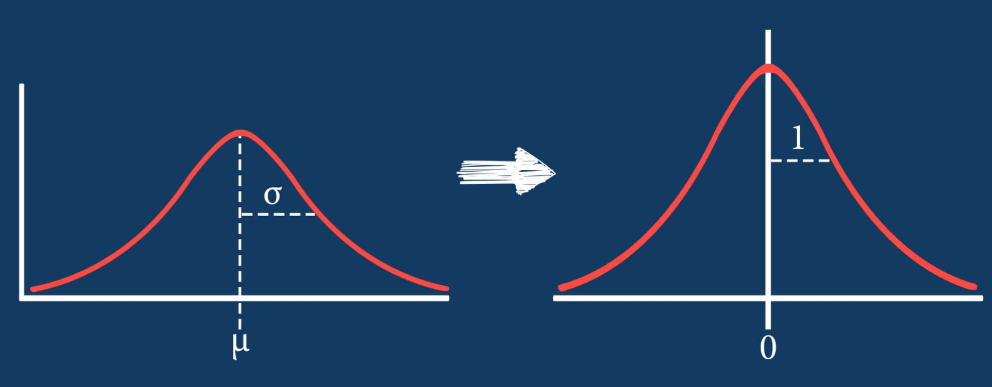


## Efectos de no Estandarizar Variables en Clustering

Introducir variables sin estandarizar en un algoritmo de clustering puede tener varios efectos negativos:

### 1. Sesgo hacia variables de mayor escala
Las variables con magnitudes más grandes pueden dominar la contribución al cálculo de distancias o similitudes entre puntos de datos. Esto significa que las variables con mayor escala tendrán un impacto desproporcionado en la formación de los clusters.

### 2. Sensibilidad a la escala
Algoritmos de clustering basados en distancia, como K-Means, son sensibles a la escala de las variables. Si una variable tiene una escala mucho mayor que otras, la contribución de esa variable será más significativa en la formación de los clusters, independientemente de su relevancia real.

### 3. Impacto en la interpretación
La interpretación de los clusters puede verse afectada si las variables no están en la misma escala. Los centroides de los clusters pueden no representar de manera precisa la tendencia central de los datos si las escalas son muy diferentes.


In [12]:
# Crear un DataFrame con los rankings y normalizar

# El código crea un nuevo DataFrame llamado 'rank_df' que contiene los rankings de las columnas en 'customer_df'.
# La función rank() se utiliza con el método 'first' para asignar rangos únicos, y luego se normaliza
# el DataFrame restando la media y dividiendo por la desviación estándar.

rank_df = customer_df.rank(method='first')
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()

# Mostrar las primeras 10 filas del DataFrame normalizado
normalized_df.sample(10)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
13283.0,-1.621846,-0.382393,-1.689540
13110.0,0.799842,1.213262,-0.566941
13462.0,-1.402645,-1.489681,-1.128644
17958.0,-0.282463,-0.570970,1.114138
17500.0,0.563717,0.524229,0.619324
17660.0,-1.218097,-0.629800,-0.715224
17548.0,-1.588805,-0.652365,-1.496934
17504.0,1.301103,1.428433,0.323563
13455.0,0.483129,-0.365469,1.171356


## La salida proporciona estadísticas descriptivas para cada columna del DataFrame normalizado (normalized_df):

- **TotalSales:**
  - `count`: Número de observaciones (filas) en la columna.
  - `mean`: Media, que es cercana a cero debido a la estandarización.
  - `std`: Desviación estándar, que es 1 después de la estandarización.
  - `min`: Valor mínimo, expresado en desviaciones estándar.
  - `25%`, `50%`, `75%`: Percentiles, indicando la posición relativa de los valores en la distribución.
  - `max`: Valor máximo, expresado en desviaciones estándar.

- **OrderCount:**
  - Las estadísticas son similares a TotalSales debido a la estandarización.

- **AvgOrderValue:**
  - Las estadísticas siguen el mismo patrón, con media cercana a cero y desviación estándar igual a 1.

Estas estadísticas son el resultado de la normalización, donde se centra la distribución alrededor de cero y se escala para tener una desviación estándar de uno. Esto facilita la comparación y el análisis de las variables en el contexto del clustering.






In [13]:
normalized_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4298.000000,4298.000000,4.298000e+03
mean,0.000000,0.000000,-6.612776e-18
std,1.000000,1.000000,1.000000e+00
min,-1.731446,-1.731446,-1.731446e+00
25%,-0.865723,-0.865723,-8.657232e-01
50%,0.000000,0.000000,0.000000e+00
75%,0.865723,0.865723,8.657232e-01
max,1.731446,1.731446,1.731446e+00


# 5. SELECCIÓN DEL NÚMERO ADECUADO DE CLÚSTERS

Listo, estamos preparados para realizar el análisis de clustering. Pero primero, necesitamos determinar cuántos clústers queremos utilizar. Hay varios enfoques para seleccionar el número de clústers, pero en este artículo cubriré dos:

1. **Método del codo (Elbow Method):**
   - Este método implica ejecutar el algoritmo de clustering para diferentes valores de k (número de clústers) y calcular la suma de las distancias cuadradas intra-cluster. Luego, observamos la curva resultante y buscamos el punto donde la adición de más clústers no proporciona una mejora significativa. Este punto se asemeja a un "codo" en la curva y sugiere el número óptimo de clústers.

2. **Coeficiente de silueta (Silhouette Coefficient):**
   - Este coeficiente mide la cohesión interna y la separación externa de los clústers. Para diferentes valores de k, calculamos el coeficiente de silueta y buscamos aquel que maximice esta medida. Un valor alto indica clústers bien definidos y separados.

Vamos a explorar ambos enfoques para determinar el número adecuado de clústers.


# 5.1 Método del Codo con la Suma de Errores Cuadráticos (SSE)

En esta sección, exploraremos el Método del Codo utilizando la Suma de Errores Cuadráticos (SSE). Este método implica ejecutar el algoritmo de clustering para diferentes valores de k (número de clústers) y calcular la suma de las distancias cuadradas intra-cluster. Luego, examinaremos la curva resultante y buscaremos el punto donde la adición de más clústers no proporciona una mejora significativa. Este punto, visualmente similar a un "codo", sugiere el número óptimo de clústers para nuestro análisis.


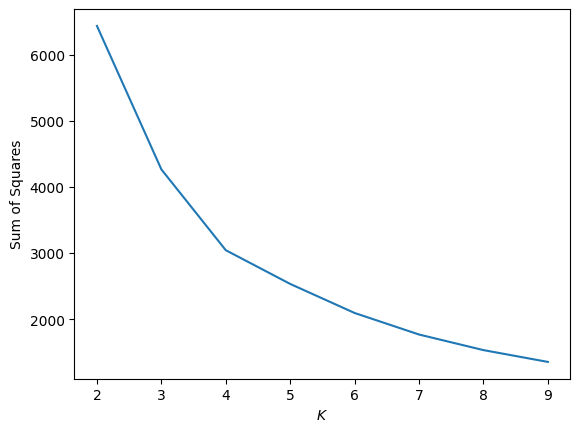

In [14]:
# Importación de Bibliotecas:
from sklearn import cluster
import numpy as np

# Inicialización de Variables:
sse = []                         # Lista para almacenar los valores de la Suma de Errores Cuadráticos (SSE).
krange = list(range(2, 10))      # Rango de valores de K que se probarán (de 2 a 90).
X = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].values  # Datos normalizados para clustering.

# Bucle para Diferentes Valores de K:
for n in krange:
    # Crear y Ajustar el Modelo de K-Means:
    model = cluster.KMeans(n_clusters=n, random_state=3, n_init=10)  # Crear modelo K-Means con el número de clústers actual.
    model.fit_predict(X)  # Ajustar el modelo a los datos y predecir asignaciones de clúster.

    # Obtener Asignaciones de Clúster y Centros:
    cluster_assignments = model.labels_  # Obtener las asignaciones de clúster para cada punto.
    centers = model.cluster_centers_     # Obtener los centros de los clústers.

    # Calcular la Suma de Errores Cuadráticos (SSE):
    sse.append(np.sum((X - centers[cluster_assignments]) ** 2))  # Calcular la SSE y añadir a la lista.

# Gráfico del Método del Codo:
plt.plot(krange, sse)      # Trazar la relación entre los valores de K y la SSE.
plt.xlabel("$K$")           # Etiqueta del eje x.
plt.ylabel("Sum of Squares") # Etiqueta del eje y.
plt.show()                  # Mostrar el gráfico resultante.


# 5.2 Silhouette coefficient

In [15]:

# Importación de Bibliotecas:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Bucle para Diferentes Valores de Número de Clústers:
for n_cluster in [3, 4, 5, 6, 7, 8, 9, 10]:
    # Crear y Ajustar el Modelo de K-Means:
    kmeans = KMeans(n_clusters=n_cluster, n_init=10).fit(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])
    
    # Calcular el Coeficiente de Silueta:
    silhouette_avg = silhouette_score(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']], 
        kmeans.labels_)
    
    # Imprimir el Coeficiente de Silueta para el Número Actual de Clústers:
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))


Silhouette Score for 3 Clusters: 0.4133
Silhouette Score for 4 Clusters: 0.4114
Silhouette Score for 5 Clusters: 0.3773
Silhouette Score for 6 Clusters: 0.3784
Silhouette Score for 7 Clusters: 0.3910
Silhouette Score for 8 Clusters: 0.3811
Silhouette Score for 9 Clusters: 0.3766
Silhouette Score for 10 Clusters: 0.3758


Para n_clusters = 3 El coeficiente de silueta promedio es: 0.4133425715037847
Para n_clusters = 4 El coeficiente de silueta promedio es: 0.4114047440903654
Para n_clusters = 5 El coeficiente de silueta promedio es: 0.3782140287922959
Para n_clusters = 6 El coeficiente de silueta promedio es: 0.37810385384513545


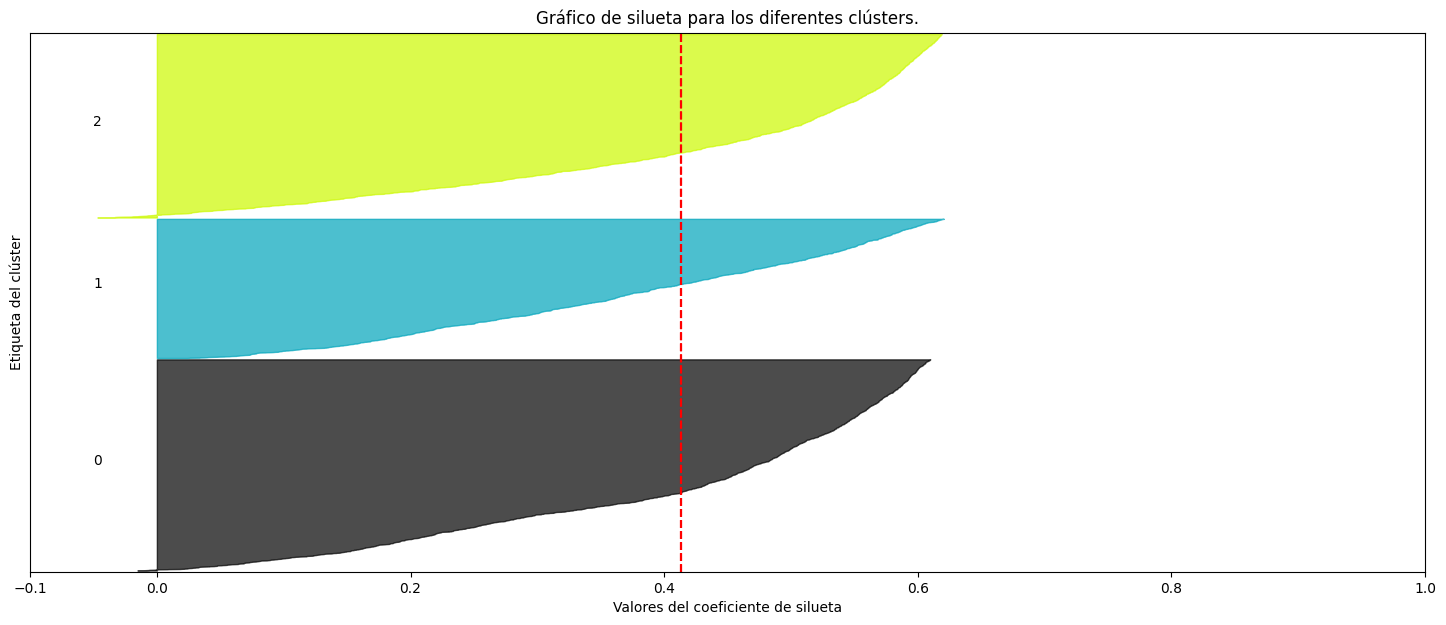

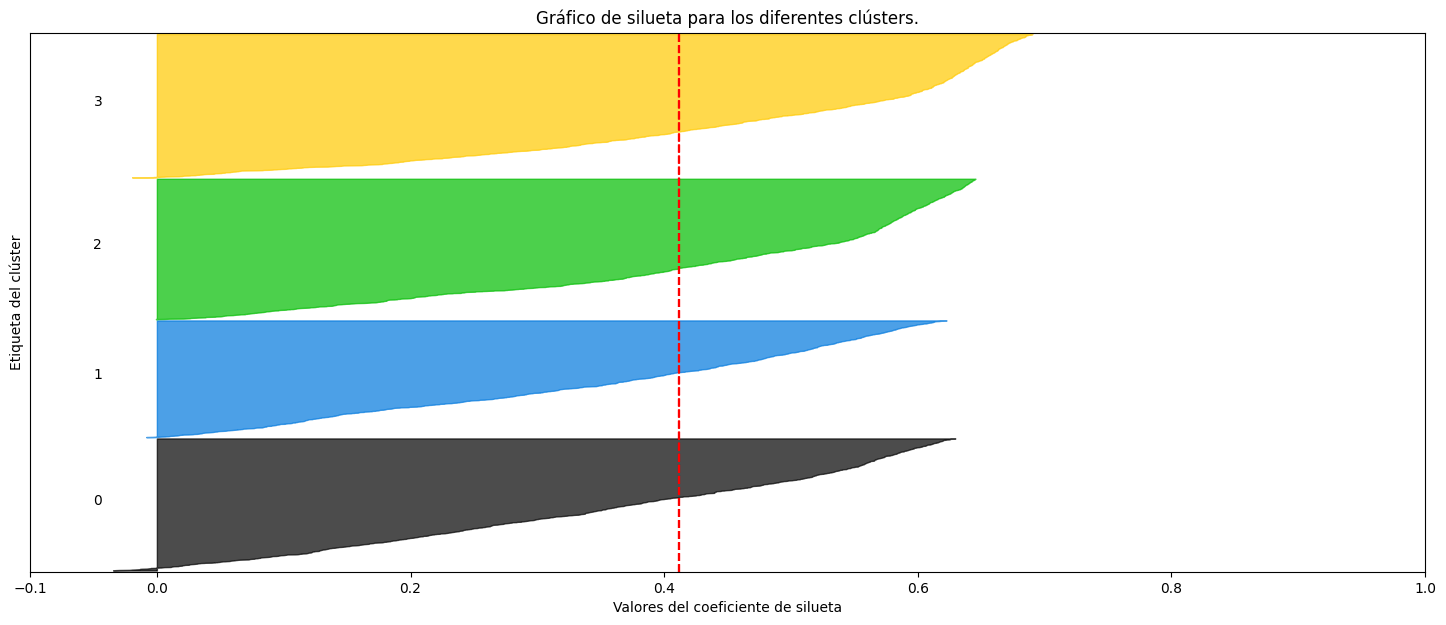

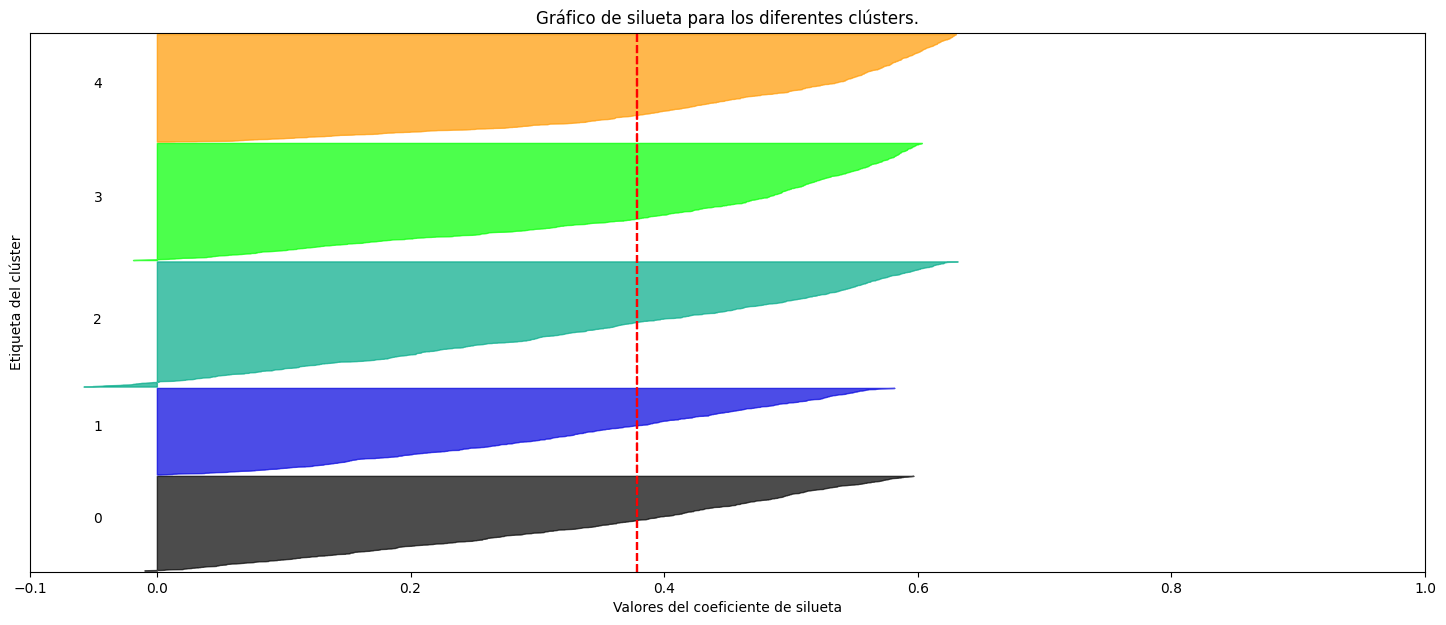

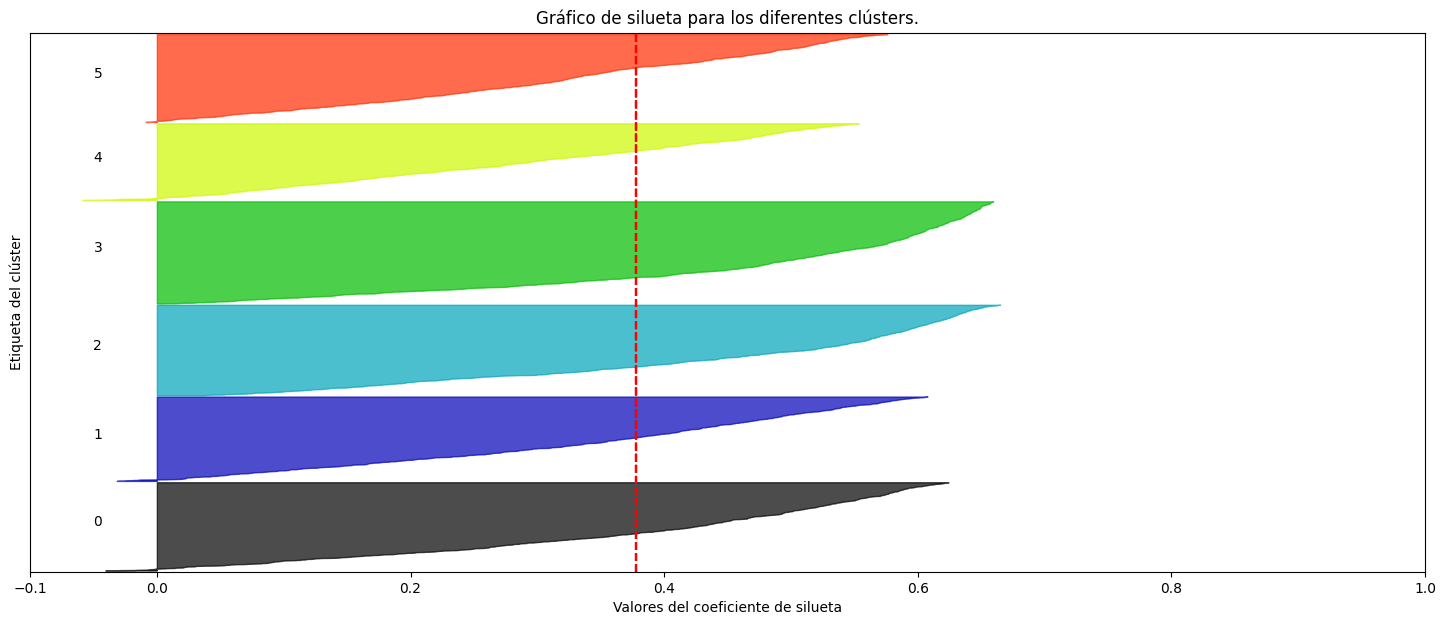

In [16]:
# Comentario sobre el Código para Visualizar el Coeficiente de Silueta para Diferentes Números de Clústers

# Definición de Variables:
range_n_clusters = [3, 4, 5, 6]  # Lista de valores de clústers a evaluar.
scores = []                      # Lista para almacenar los coeficientes de silueta.

# Función para Determinar el Número de Clústers con Coeficiente de Silueta:
def number_of_clusters_silhouette():
    for n_clusters in range_n_clusters:
        # Crear una subtrama con 1 fila y 1 columna
        fig, (ax1) = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)
         
        # Configuración de la trama para el gráfico de silueta
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(normalized_df) + (n_clusters + 1) * 10])
        
        # Inicializar el clusterer con el valor de n_clusters y una semilla aleatoria
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
        cluster_labels = clusterer.fit_predict(normalized_df)
        
        # Calcular el coeficiente de silueta promedio
        silhouette_avg = silhouette_score(normalized_df, cluster_labels)
        scores.append(silhouette_avg)
        print("Para n_clusters =", n_clusters,
              "El coeficiente de silueta promedio es:", silhouette_avg)
        
        # Calcular los valores de silueta para cada muestra
        sample_silhouette_values = silhouette_samples(normalized_df, cluster_labels)
        
        # Configuración de variables para visualización
        y_lower = 10
        
        # Bucle para cada clúster
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            # Configuración de colores y relleno para el gráfico de silueta
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
    
            # Etiquetar los gráficos de silueta con los números de clúster
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Actualizar la posición y_lower para el siguiente gráfico
            y_lower = y_upper + 10
    
            # Configuración de la trama
            ax1.set_title("Gráfico de silueta para los diferentes clústers.")
            ax1.set_xlabel("Valores del coeficiente de silueta")
            ax1.set_ylabel("Etiqueta del clúster")
        
            # Línea vertical punteada para el coeficiente de silueta promedio
            ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        
            # Limpiar las etiquetas / marcas del eje y
            ax1.set_yticks([])
            # Configurar marcas en el eje x
            ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Llamar a la función para visualizar el coeficiente de silueta
number_of_clusters_silhouette()


# 6. RUNNING CLUSTERING

In [17]:

# Aplicar el algoritmo de K-Means con 4 clústers a las variables normalizadas de interés
kmeans = KMeans(n_clusters=4, n_init=10).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])

# Crear un nuevo DataFrame copiando las variables de interés y asignando la etiqueta de clúster
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

# Mostrar las primeras 15 filas del DataFrame resultante
four_cluster_df.head(15)

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724999,-1.731446,1.731446,0
12347.0,1.457445,1.064173,1.401033,3
12348.0,0.967466,0.573388,0.929590,3
12349.0,0.944096,-1.730641,1.683093,0
12350.0,-0.732148,-1.729835,0.331622,0
12352.0,1.193114,1.309162,0.169639,3
12353.0,-1.636352,-1.729029,-1.570269,2
12354.0,0.508917,-1.728223,1.612981,0
12355.0,-0.386422,-1.727417,0.970690,0


# 7. INTERPRETANDO LOS RESULTADOS

In [18]:
# Extraer las métricas de los centroides para cada clúster
cluster1_metrics = kmeans.cluster_centers_[0]
cluster2_metrics = kmeans.cluster_centers_[1]
cluster3_metrics = kmeans.cluster_centers_[2]
cluster4_metrics = kmeans.cluster_centers_[3]

# Organizar las métricas en una lista de listas para construir un DataFrame
data = [cluster1_metrics, cluster2_metrics, cluster3_metrics, cluster4_metrics]
cluster_center_df = pd.DataFrame(data)

# Nombrar las columnas del DataFrame con los nombres de las variables originales
cluster_center_df.columns = four_cluster_df.columns[0:3]

# Mostrar el DataFrame con las métricas de los centroides de clúster
cluster_center_df

,TotalSales,OrderCount,AvgOrderValue
0,-0.132715,-0.850159,0.798678
1,0.216024,0.713353,-0.642768
2,-1.247107,-0.798320,-1.061436
3,1.206238,1.005871,0.867373


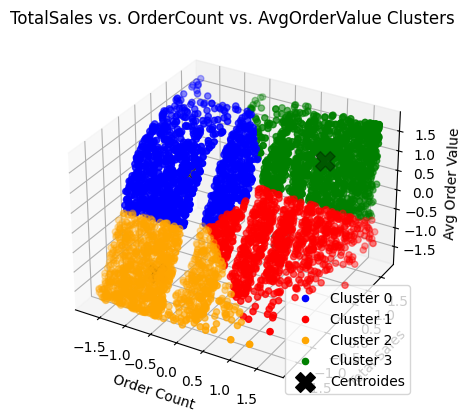

In [19]:
# Gráfico de dispersión en 3D para TotalSales vs. OrderCount con colores según el clúster
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Puntos de datos
ax.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],  
    c='blue', label='Cluster 0')

ax.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],  
    c='red', label='Cluster 1')

ax.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],  
    c='orange', label='Cluster 2')

ax.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],  
    c='green', label='Cluster 3')

# Centroides
ax.scatter(
    cluster_center_df['OrderCount'], 
    cluster_center_df['TotalSales'],
    cluster_center_df['AvgOrderValue'],
    marker='X', s=200, c='black', label='Centroides')

ax.set_title('TotalSales vs. OrderCount vs. AvgOrderValue Clusters')
ax.set_xlabel('Order Count')
ax.set_ylabel('Total Sales')
ax.set_zlabel('Avg Order Value')
ax.legend()

plt.show()


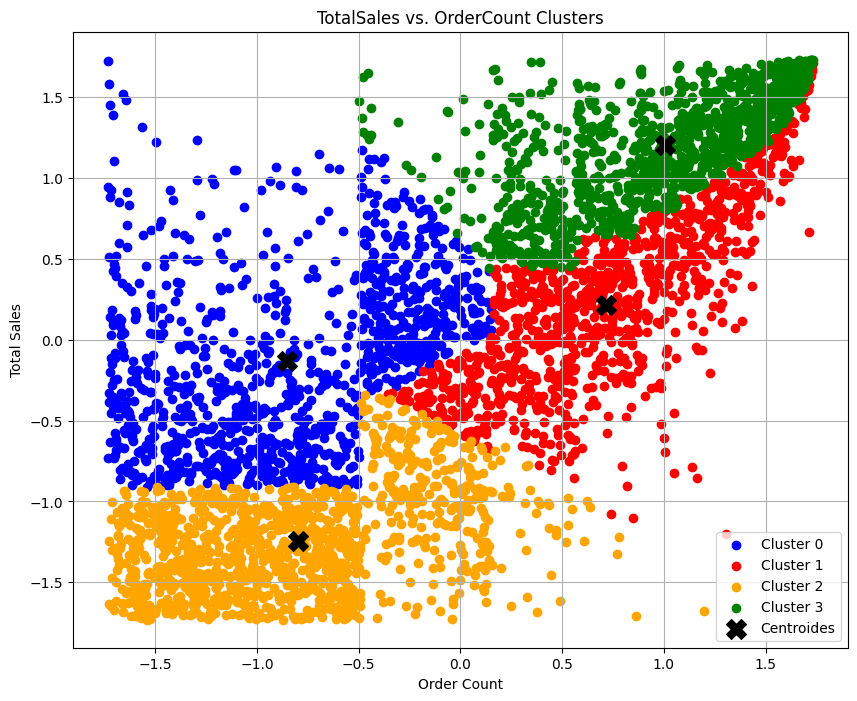

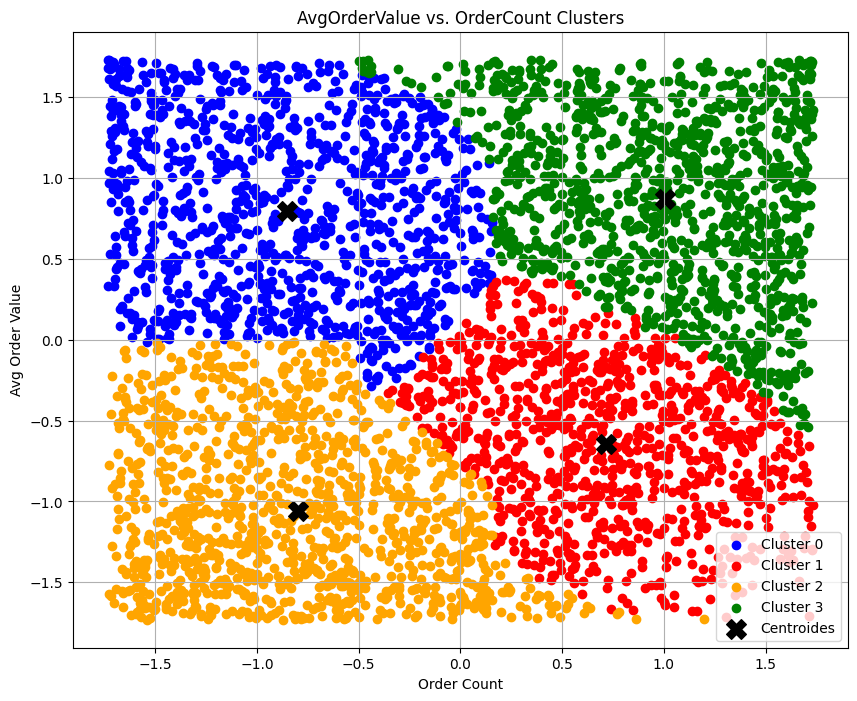

In [20]:
# Configurar el tamaño de las figuras
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

# Gráfico de dispersión para TotalSales vs. OrderCount con colores según el clúster
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    c='blue', label='Cluster 0')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    c='red', label='Cluster 1')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    c='orange', label='Cluster 2')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    c='green', label='Cluster 3')

# Centroides para TotalSales vs. OrderCount
plt.scatter(
    cluster_center_df['OrderCount'], 
    cluster_center_df['TotalSales'],
    marker='X', s=200, c='black', label='Centroides')

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')
plt.legend()
plt.grid()
plt.show()


# Gráfico de dispersión para AvgOrderValue vs. OrderCount con colores según el clúster
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue', label='Cluster 0')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red', label='Cluster 1')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange', label='Cluster 2')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green', label='Cluster 3')

# Centroides para AvgOrderValue vs. OrderCount
plt.scatter(
    cluster_center_df['OrderCount'], 
    cluster_center_df['AvgOrderValue'],
    marker='X', s=200, c='black', label='Centroides')

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')
plt.legend()
plt.grid()
plt.show()


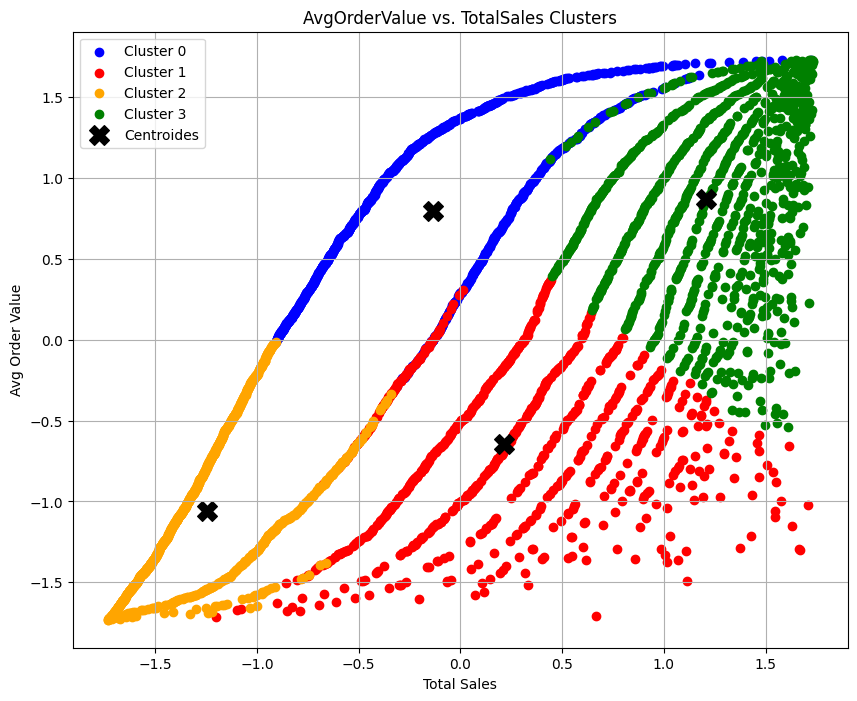

In [21]:
# Gráfico de dispersión para AvgOrderValue vs. TotalSales con colores según el clúster
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue', label='Cluster 0')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red', label='Cluster 1')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange', label='Cluster 2')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green', label='Cluster 3')

# Centroides para AvgOrderValue vs. TotalSales
plt.scatter(
    cluster_center_df['TotalSales'], 
    cluster_center_df['AvgOrderValue'],
    marker='X', s=200, c='black', label='Centroides')

plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')
plt.legend()
plt.grid()
plt.show()


# Descubre tu Estilo de Compra

## Cluster 0: "Exploradores Serenos"
Bienvenidos al Cluster 0, hogar de los "Exploradores Serenos". Aquí, la actividad de compra es tranquila, el gasto es moderado y la diversidad de productos es clave. Encuentra tu estilo explorando joyas como "REX CASH+CARRY JUMBO SHOPPER" y "WHITE HANGING HEART T-LIGHT HOLDER". ¡Descubre el encanto en la simplicidad de tu elección!

## Cluster 1: "Aficionados a la Euforia de Compras"
Únete a los "Aficionados a la Euforia de Compras" en el Cluster 1. Experimenta la emoción de compras frecuentes y un gasto abundante. Desde los llamativos "JUMBO BAG RED RETROSPOT" hasta la elegancia de "REGENCY CAKESTAND 3 TIER", aquí cada compra es una celebración. ¡Deja que la euforia de tus elecciones ilumine tu experiencia de compra!

## Cluster 2: "Elegancia Moderada, Compra Constante"
En el Cluster 2, vive la "Elegancia Moderada, Compra Constante". Con un equilibrio perfecto entre actividad y gasto, este grupo aprecia la moderación. Descubre la elegancia duradera de "REGENCY CAKESTAND 3 TIER" y la sutil belleza de "WHITE HANGING HEART T-LIGHT HOLDER". ¡Haz de tus elecciones un reflejo de tu estilo único!

## Cluster 3: "Estilo Sofisticado de Compras"
Los consumidores del Cluster 3 abrazan el "Estilo Sofisticado de Compras". Con una actividad moderada pero un alto valor de orden, este grupo valora la calidad sobre la cantidad. Explora "WHITE HANGING HEART T-LIGHT HOLDER" y "REX CASH+CARRY JUMBO SHOPPER" para una experiencia de compra que redefine el lujo. ¡Eleva tu estilo con cada selección!


# 8. Encontrar el artículo más vendido por clúster. Recomendación


In [22]:
# Crear un nuevo dataframe mostrando el top 3 de artículos vendidos por cada clúster
top_items_by_cluster = pd.DataFrame()

# Iterar sobre cada clúster
for cluster_id in range(4):
    # Filtrar el dataframe original para incluir solo los clientes del clúster actual
    cluster_df = df.loc[df['CustomerID'].isin(four_cluster_df.loc[four_cluster_df['Cluster'] == cluster_id].index)]
    
    # Encontrar el top 10 de artículos vendidos y agregar al nuevo dataframe
    top_items = cluster_df.groupby('Description').count()['StockCode'].sort_values(ascending=False).head(10)
    top_items_by_cluster[f'Cluster {cluster_id}'] = top_items.index

# Mostrar los resultados
top_items_by_cluster


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,REGENCY CAKESTAND 3 TIER,WHITE HANGING HEART T-LIGHT HOLDER,REX CASH+CARRY JUMBO SHOPPER,JUMBO BAG RED RETROSPOT
1,WHITE HANGING HEART T-LIGHT HOLDER,REX CASH+CARRY JUMBO SHOPPER,WHITE HANGING HEART T-LIGHT HOLDER,REGENCY CAKESTAND 3 TIER
2,ASSORTED COLOUR BIRD ORNAMENT,REGENCY CAKESTAND 3 TIER,REGENCY CAKESTAND 3 TIER,WHITE HANGING HEART T-LIGHT HOLDER
3,SET OF 3 CAKE TINS PANTRY DESIGN,PARTY BUNTING,ASSORTED COLOUR BIRD ORNAMENT,LUNCH BAG RED RETROSPOT
4,PARTY BUNTING,ASSORTED COLOUR BIRD ORNAMENT,BAKING SET 9 PIECE RETROSPOT,PARTY BUNTING
5,BAKING SET 9 PIECE RETROSPOT,HEART OF WICKER SMALL,HEART OF WICKER SMALL,ASSORTED COLOUR BIRD ORNAMENT
6,POSTAGE,LUNCH BAG BLACK SKULL.,NATURAL SLATE HEART CHALKBOARD,SET OF 3 CAKE TINS PANTRY DESIGN
7,JAM MAKING SET WITH JARS,JUMBO BAG RED RETROSPOT,PARTY BUNTING,LUNCH BAG BLACK SKULL.
8,PACK OF 72 RETROSPOT CAKE CASES,HEART OF WICKER LARGE,HEART OF WICKER LARGE,POSTAGE
9,PAPER CHAIN KIT 50'S CHRISTMAS,NATURAL SLATE HEART CHALKBOARD,RETROSPOT TEA SET CERAMIC 11 PC,PACK OF 72 RETROSPOT CAKE CASES
